<a href="https://colab.research.google.com/github/girimanoj/EVA_Assignments/blob/master/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Installaing Keras Package 

# https://keras.io/
!pip install -q keras
import keras

In [0]:
#Inporting the Numpy
import numpy as np

#Importing different functions from keras package, like sequential model, flatten and convolution2D layers etc. and Importing the MNIST dataset from keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

**Load pre-shuffled MNIST data into train and test sets**

In [4]:
#Loading the MNIST package Train and Test Data. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
#Printing the shape of Train data and printing one sample image from Train Data. We see the shape printing as 60000, 28, 28 which means we have 60000 train data images of pixes array size 28x28
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#Reshaping the X_train and X_test data to 28x28x1 from 28x28
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#Converting thr Train Data as float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
#Printing first 10 Values from y_train
Y_train[:10]


In [21]:
#Building Convolution Neural Network

from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.15))
model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 7))

#model.add(Convolution2D(10, 11))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_20 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_21 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_22 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 22, 32)        0         
__________

In [0]:
#Compiling the model with Loss function categorical_crossentropy, optimizer adam and metrix accuracy
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [27]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

Epoch 1/20
   32/60000 [..............................] - ETA: 4:16 - loss: 4.9056e-05 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 246s 4ms/step - loss: 0.0129 - acc: 0.9960
Epoch 2/20
60000/60000 [==============================] - 247s 4ms/step - loss: 0.0132 - acc: 0.9955
Epoch 3/20
60000/60000 [==============================] - 247s 4ms/step - loss: 0.0110 - acc: 0.9964
Epoch 4/20
60000/60000 [==============================] - 247s 4ms/step - loss: 0.0117 - acc: 0.9961
Epoch 5/20
60000/60000 [==============================] - 246s 4ms/step - loss: 0.0113 - acc: 0.9962
Epoch 6/20
60000/60000 [==============================] - 246s 4ms/step - loss: 0.0103 - acc: 0.9964
Epoch 7/20
60000/60000 [==============================] - 247s 4ms/step - loss: 0.0103 - acc: 0.9964
Epoch 8/20
60000/60000 [==============================] - 246s 4ms/step - loss: 0.0089 - acc: 0.9970
Epoch 9/20
60000/60000 [==============================] - 246s 4ms/step - loss: 0.0088 - acc: 0.9969
Epoch 10/20
60000/60000 [==============================] - 246s 4ms/step - loss: 0.0090 - acc: 0.9968


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [29]:
print(score)

[0.034745066832979184, 0.9916]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

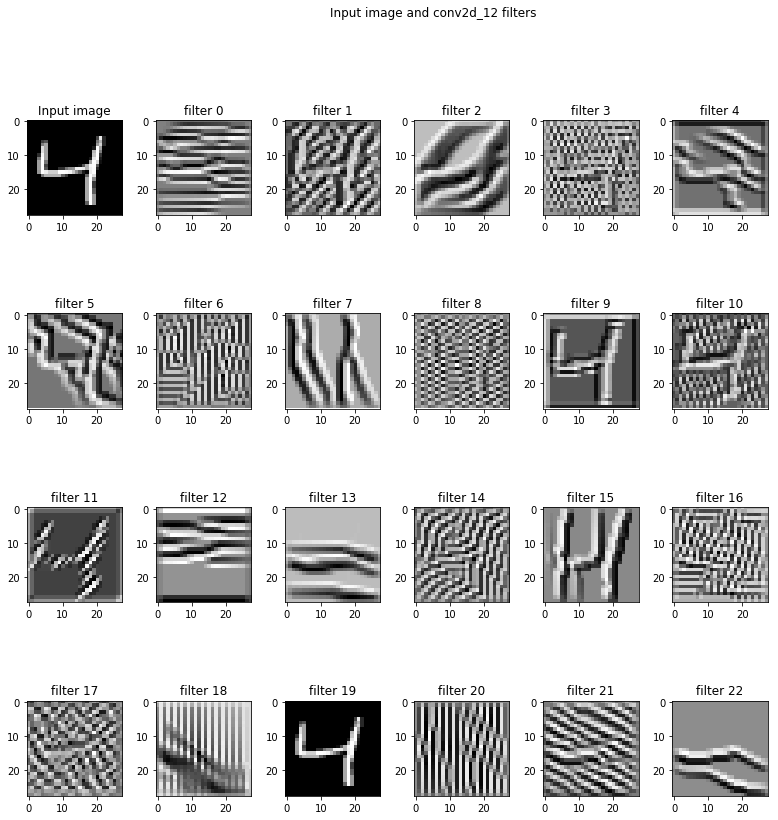

In [30]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_12'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()